In [1]:
import pandas as pd
import numpy as np
import requests
import io
url1="https://raw.githubusercontent.com/insaid2018/INSAID-Activities/main/Data%20Detective%20Challenge/AB_NYC_2019.csv"
df_nyc = pd.read_csv(url1)
url2="https://raw.githubusercontent.com/insaid2018/INSAID-Activities/main/Data%20Detective%20Challenge/market_data.csv"
df_mkt = pd.read_csv(url2)
url3="https://raw.githubusercontent.com/insaid2018/INSAID-Activities/main/Data%20Detective%20Challenge/netflix_content.csv"
df_nf=pd.read_csv(url3)
url4="https://raw.githubusercontent.com/insaid2018/INSAID-Activities/main/Data%20Detective%20Challenge/goodreads.csv"
df_gr=pd.read_csv(url4)
url5="https://raw.githubusercontent.com/insaid2018/INSAID-Activities/main/Data%20Detective%20Challenge/zomato.csv"
df_zom = pd.read_csv(url5,encoding='latin1')
url6="https://raw.githubusercontent.com/insaid2018/INSAID-Activities/main/Data%20Detective%20Challenge/VideoGameSales.csv"
df_vg=pd.read_csv(url6)
print("Done")

Done


# Q1

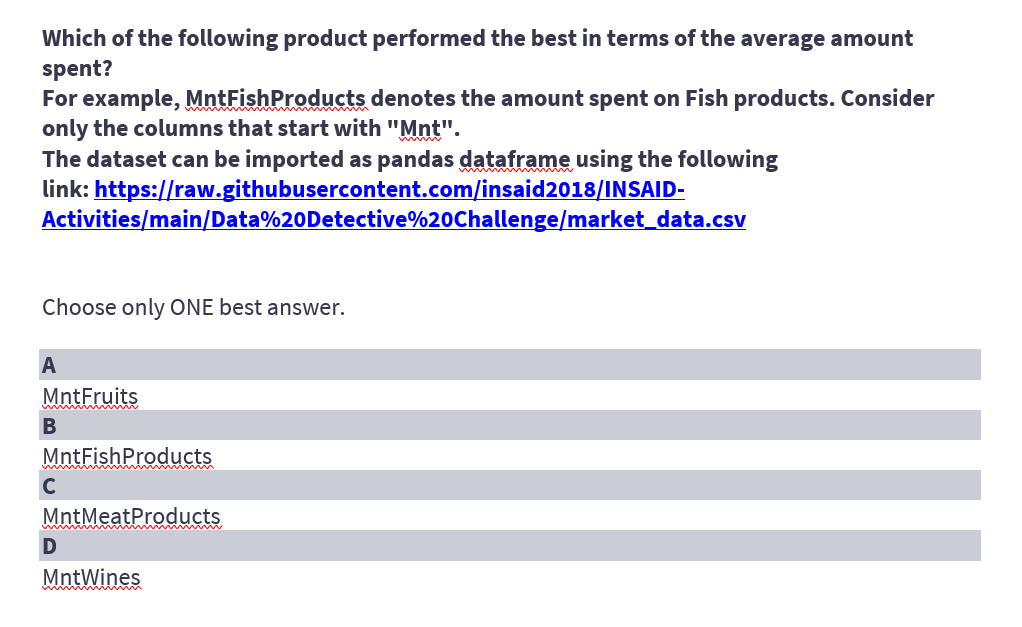

In [147]:
avg1=df_mkt['MntWines'].mean()
avg2=df_mkt['MntFruits'].mean()
avg3=df_mkt['MntMeatProducts'].mean()
avg4=df_mkt['MntFishProducts'].mean()
avg5=df_mkt['MntSweetProducts'].mean()
avg6=df_mkt['MntGoldProds'].mean()
print(avg1,avg2,avg3,avg4,avg5,avg6)

303.9357142857143 26.302232142857143 166.95 37.52544642857143 27.06294642857143 44.021875


# Answer #1 =  Option D : MntWines
====================================================================================================================

# Q2

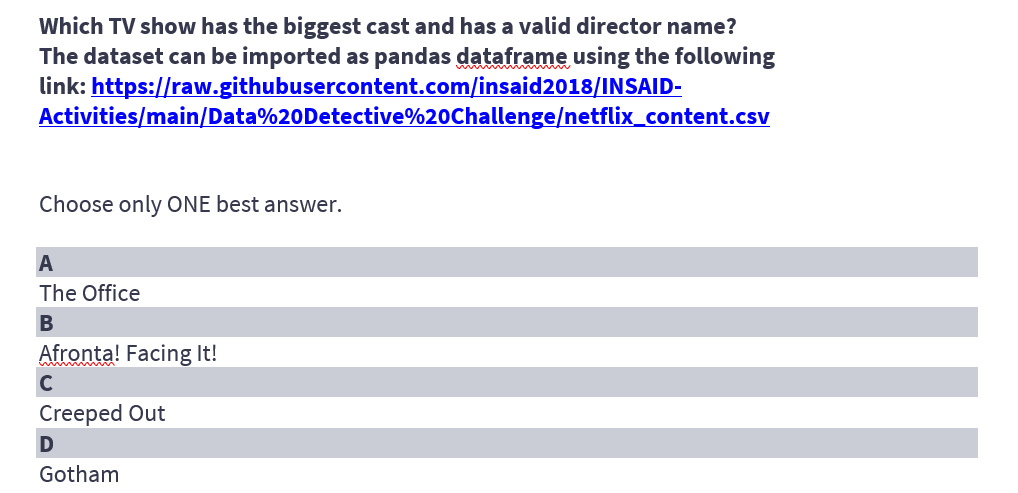

In [149]:
df_nf_tvs=df_nf.copy()
df_nf.fillna(value='Invalid',inplace=True)
df_nf_tvs=df_nf_tvs[(df_nf_tvs['type']=='TV Show') & (df_nf_tvs['director']!='Invalid')]
max_nc=df_nf_tvs['num_cast'].max()
df_nf_tvs[df_nf_tvs['num_cast']==max_nc]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_cast,primary_genre
322,s323,TV Show,Afronta! Facing It!,Juliana Vicente,"Loo Nascimento, Ingrid Silva, Rincon Sapiência...",Brazil,"October 31, 2020",2017,TV-PG,1 Season,"Docuseries, International TV Shows",This docuseries spotlights Afro-Brazilian thin...,26,Docuseries


# Answer #2 =  Option B: Afronta! Facing It!
====================================================================================================================

# Q3

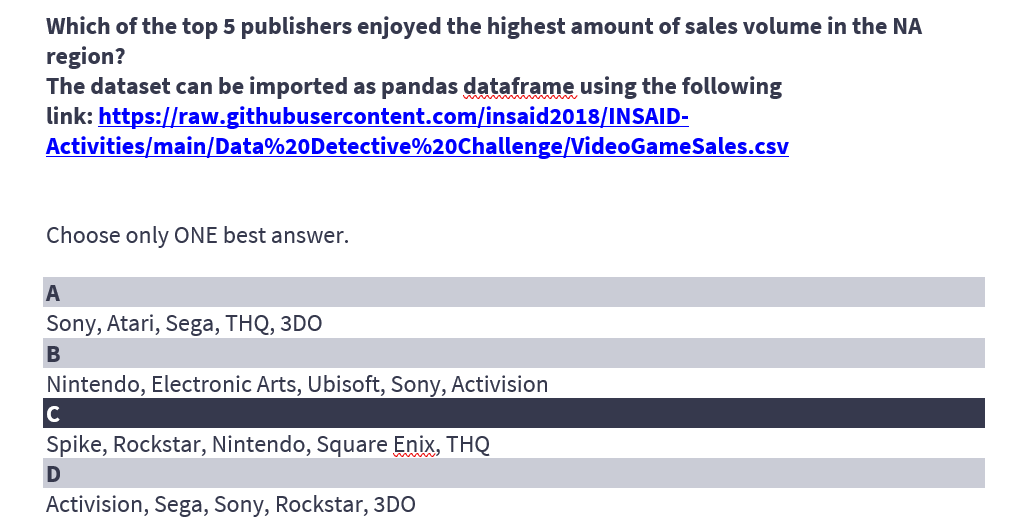

In [150]:
df_vg_hamt=df_vg.copy()
df_vg_hamt['NA_SoS']=df_vg_hamt.groupby('Publisher')['NA_Sales_Volume'].transform('sum')
df_vg_hamt2=df_vg_hamt[['Publisher','NA_SoS']]
df_vg_hamt3=df_vg_hamt2.copy()
df_vg_hamt3.drop_duplicates(inplace=True)
df_vg_hamt3.reset_index(drop=True,inplace=True)
vg_hamt=df_vg_hamt3['NA_SoS'].nlargest(5)
df_vg_hamt3['sol'] = np.where((df_vg_hamt3['NA_SoS'].isin(vg_hamt)), 1, 0)
df_vg_hamt4=df_vg_hamt3.loc[df_vg_hamt3['sol'] == 1]
df_vg_hamt4.reset_index(drop=True,inplace=True)
df_vg_hamt4=df_vg_hamt4.sort_values(by=['NA_SoS'],ascending=False)
df_vg_hamt4[['Publisher','NA_SoS']]

,Publisher,NA_SoS
0,Nintendo,816.87
4,Electronic Arts,595.07
2,Activision,429.70
1,Sony Computer Entertainment,265.22
3,Ubisoft,253.43


# Answer #3 =  Option B: Nitendo, Electronic Arts, Ubisoft, Sony, Activision
====================================================================================================================

# Q4

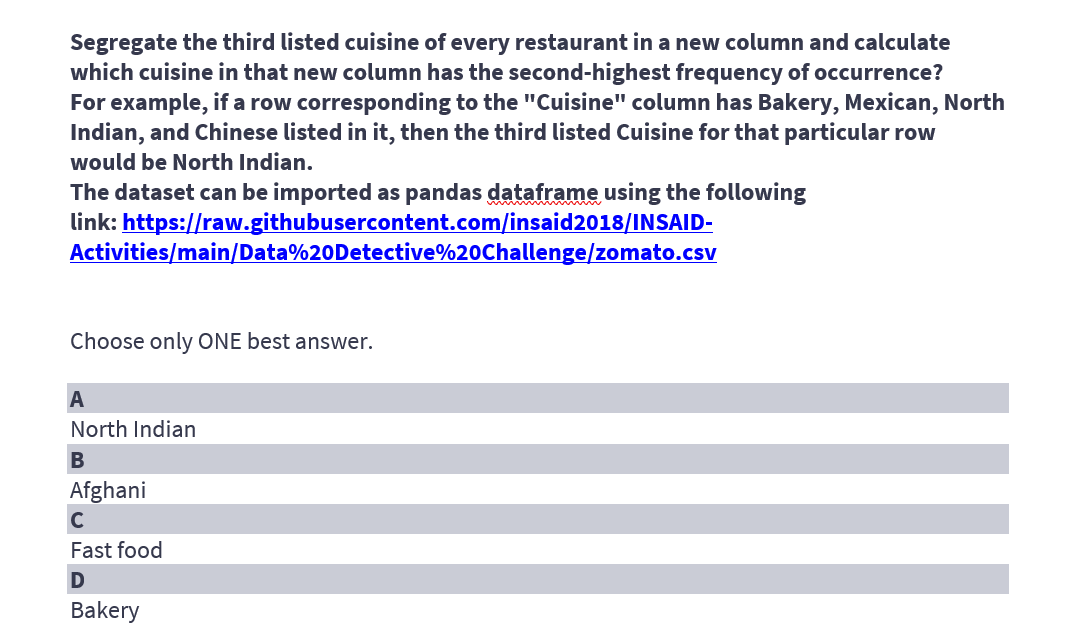

In [151]:
df_zom_c=df_zom.copy()
df_zom_c=df_zom[['Restaurant Name','Cuisines']]
#clist=df_zom_c['Cuisines'].values.tolist()
df_zom_c
x = df_zom_c['Cuisines'].str.split(',')
x

0              [French,  Japanese,  Desserts]
1                                  [Japanese]
2       [Seafood,  Asian,  Filipino,  Indian]
3                          [Japanese,  Sushi]
4                         [Japanese,  Korean]
                        ...                  
9546                                [Turkish]
9547      [World Cuisine,  Patisserie,  Cafe]
9548                [Italian,  World Cuisine]
9549                        [Restaurant Cafe]
9550                                   [Cafe]
Name: Cuisines, Length: 9551, dtype: object

In [98]:
#df_zom_c['Third_Cuisine']=x[2]
#df_zom_tc_list = pd.DataFrame(df_zom_c['Cuisines'].values.tolist())
df_zom_tc_list = [df_zom_c['Cuisines'].values.tolist()]
for i in df_zom_tc_list:
    if i[1]=='':
        i[1]=='NULL'
        i[2]=='NULL'
    elif i[2]=='':
        i[2]=='NULL'
df_zom_tc_list

[['French, Japanese, Desserts',
  'Japanese',
  'Seafood, Asian, Filipino, Indian',
  'Japanese, Sushi',
  'Japanese, Korean',
  'Chinese',
  'Asian, European',
  'Seafood, Filipino, Asian, European',
  'European, Asian, Indian',
  'Filipino',
  'Filipino, Mexican',
  'American, Ice Cream, Desserts',
  'Filipino, Mexican',
  'Filipino',
  'Korean',
  'Cafe, American, Italian, Filipino',
  'Italian, Pizza',
  'Filipino',
  'Cafe, Korean, Desserts',
  'Cafe, Bakery, American, Italian',
  'Seafood, American, Mediterranean, Japanese',
  'American, Asian, Italian, Seafood',
  'Fast Food, French',
  'Cafe',
  'Bakery',
  'Brazilian',
  'Pizza',
  'Japanese',
  'Arabian',
  'Japanese',
  'Brazilian, Cafe',
  'Italian',
  'Pizza',
  'Bar Food, Brazilian',
  'Mexican, Grill',
  'International',
  'Peruvian, Latin American',
  'American, Grill',
  'Seafood',
  'International',
  'Italian',
  'American, Burger',
  'Seafood, Bar Food, Brazilian',
  'Desserts, Cafe',
  'Juices, Healthy Food',
  'Be

# Answer #4 =  Option  {TBD}
====================================================================================================================

# Q5

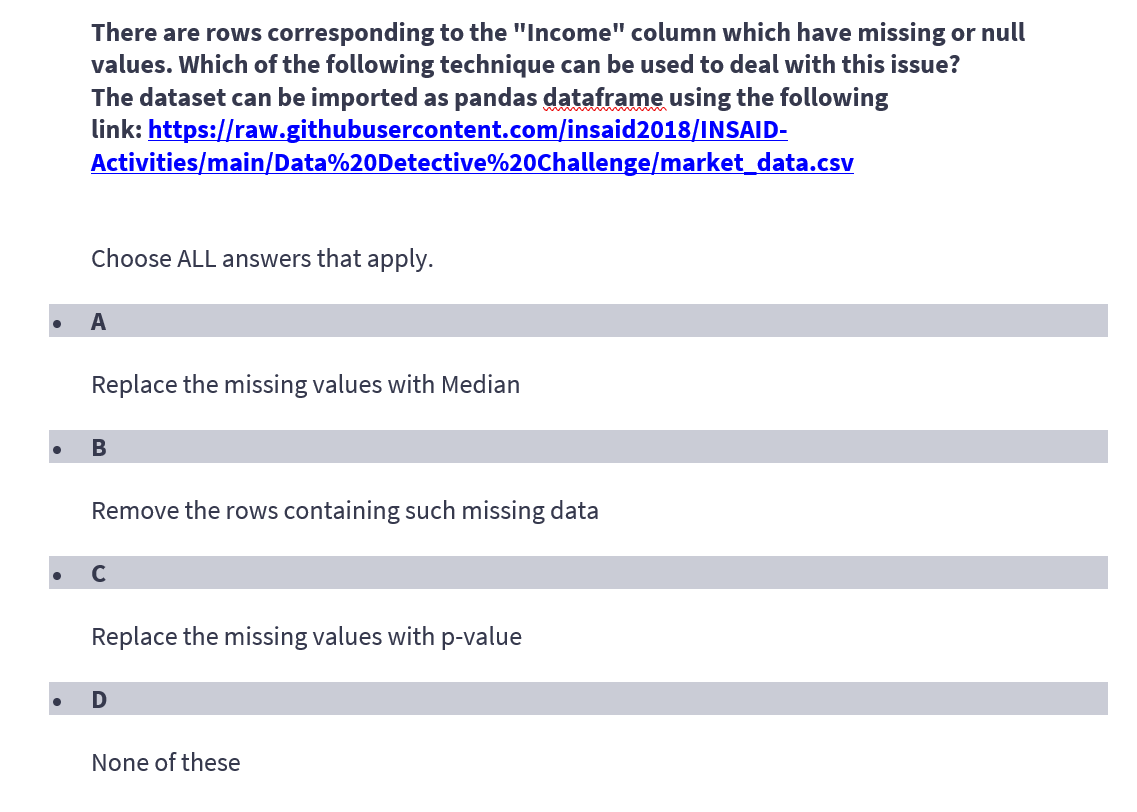

#  Answer #5 =  Option B: Remove the rows containing such missing data
====================================================================================================================

# Q6

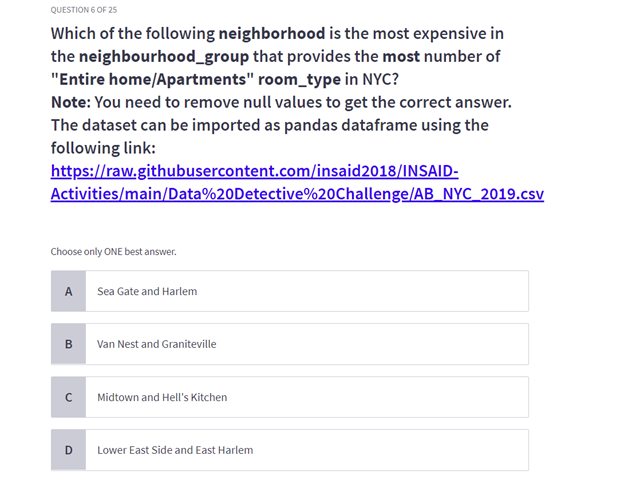
https://raw.githubusercontent.com/insaid2018/INSAID-Activities/main/Data%20Detective%20Challenge/AB_NYC_2019.csv

In [152]:
df_nyc.to_excel('AB_NYC_2019.xlsx')
df_rt=df_nyc.loc[df_nyc['room_type'] == 'Entire home/apt']
ng_rtc=df_rt.groupby('neighbourhood_group').count()
ng_rtc_max=df_rt.groupby('neighbourhood_group')['room_type'].count().idxmax()
df_nbg_rtc_ng=df_rt.loc[df_rt['neighbourhood_group'] == ng_rtc_max]
df_ng=df_nyc.loc[df_nyc['neighbourhood_group'] == ng_rtc_max]
df_exp_ng=df_ng['price'].max()
nb_price_max=df_ng.groupby('neighbourhood')['price'].max()
df_exp_ng3=df_ng['price'].nlargest(3)
df_ng['sol'] = np.where((df_ng['price'].isin(df_exp_ng3)), 1, 0)
df_ng2=df_ng.loc[df_ng['sol'] == 1]
df_ng_pmax=df_ng2[['id','neighbourhood_group','neighbourhood','price']]
df_ng_pmax=df_ng_pmax.sort_values(['price','neighbourhood'], ascending=[False,True])
print("DF_NG_PMAX:\n",df_ng_pmax)

DF_NG_PMAX:
              id neighbourhood_group    neighbourhood  price
29238  22436899           Manhattan  Upper West Side  10000
6530    4737930           Manhattan      East Harlem   9999
12342   9528920           Manhattan  Lower East Side   9999
40433  31340283           Manhattan  Lower East Side   9999


<ipython-input-152-5d64befbd9b5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ng['sol'] = np.where((df_ng['price'].isin(df_exp_ng3)), 1, 0)


# Answer #6=  Option D : Lower East Side and East Harlem
====================================================================================================================

# Q7

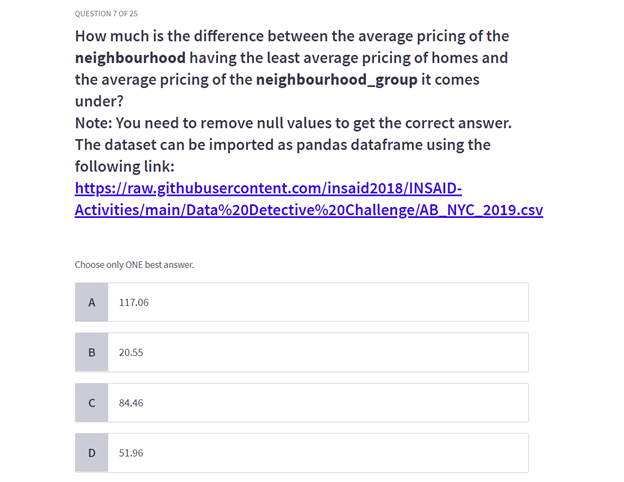

In [29]:
df_nyc_h=df_nyc.copy()
df_nyc_h
df_nyc_h=df_nyc_h[df_nyc_h['room_type'].str.contains('home',case=False)]
df_nyc_ap=df_nyc_h.copy()
df_nyc_ap['Avg_Prc_Nbg']=df_nyc_ap.groupby('neighbourhood_group')['price'].transform('mean')
#df_nyc_ap['Avg_Prc_N']=df_nyc_ap.groupby(['neighbourhood_group','neighbourhood'])['price'].transform('mean')
df_nyc_ap['Avg_Prc_N']=df_nyc_ap.groupby('neighbourhood')['price'].transform('mean')
df_nyc_ap['Avg_Prc_N_min']=df_nyc_ap.groupby('neighbourhood_group')['Avg_Prc_N'].transform('min')
df_nyc_ap_cal=df_nyc_ap.copy()
df_nyc_ap_cal2=df_nyc_ap_cal[['neighbourhood_group','neighbourhood','Avg_Prc_Nbg','Avg_Prc_N','Avg_Prc_N_min']]
df_nyc_ap_cal2.drop_duplicates(inplace=True)
df_nyc_ap_cal2.reset_index(drop=True,inplace=True)
#df_nyc_ap_cal2[df_nyc_ap_cal2['neighbourhood']=='Williamsburg']
df_nyc_ap_cal2[df_nyc_ap_cal2['neighbourhood_group']=='Brooklyn']
#df_nyc_ap_cal2
#=============
#mean_neighb_hd_2 = df_nyc_ap.groupby('neighbourhood')[['price']].agg('mean')
#display(mean_neighb_hd_2.sort_values(by="price", ascending=True))



<ipython-input-29-501be7bada45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyc_ap_cal2.drop_duplicates(inplace=True)


,neighbourhood_group,neighbourhood,Avg_Prc_Nbg,Avg_Prc_N,Avg_Prc_N_min
1,Brooklyn,Clinton Hill,178.327545,243.982659,100.428571
7,Brooklyn,Williamsburg,178.327545,206.094130,100.428571
8,Brooklyn,Fort Greene,178.327545,193.726384,100.428571
9,Brooklyn,Crown Heights,178.327545,159.631094,100.428571
10,Brooklyn,Bedford-Stuyvesant,178.327545,154.780641,100.428571
13,Brooklyn,Bushwick,178.327545,145.784661,100.428571
14,Brooklyn,South Slope,178.327545,177.042105,100.428571
16,Brooklyn,Prospect-Lefferts Gardens,178.327545,150.074733,100.428571
17,Brooklyn,Greenpoint,178.327545,190.115756,100.428571
22,Brooklyn,Prospect Heights,178.327545,230.084112,100.428571


In [145]:
df_nyc_ap_cal3.drop_duplicates(inplace=True)
df_nyc_ap_cal3.reset_index(drop=True,inplace=True)
df_nyc_ap_cal4=df_nyc_ap_cal3.copy()
#a_min=df_nyc_ap_cal4.groupby(['neighbourhood'])['Avg_Prc_N'].idxmin()
df_nyc_ap_cal4['Avg_Prc_N_min']=df_nyc_ap_cal4.groupby(['neighbourhood'])['Avg_Prc_N'].transform('min')
df_nyc_ap_cal4[['neighbourhood_group','neighbourhood','Avg_Prc_Nbg','Avg_Prc_N_min']]
df_nyc_ap_cal4.drop_duplicates(inplace=True)
#(df_nyc_ap_cal4['neighbourhood_group'].sum())-float(df_nyc_ap_cal4['neighbourhood'].sum())

# Q8

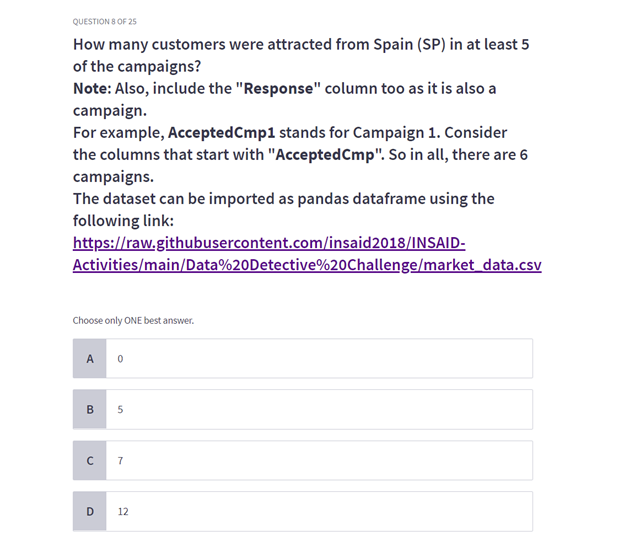
https://raw.githubusercontent.com/insaid2018/INSAID-Activities/main/Data%20Detective%20Challenge/market_data.csv

In [153]:
df_mkt.to_excel('MKT.xlsx')
df_mkt1=df_mkt.loc[df_mkt['Country'] == 'SP']
df_mkt2=df_mkt1[['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
df_mkt3=df_mkt2.copy()
df_mkt3['Combine']=df_mkt1['AcceptedCmp1'].map(str)+df_mkt1['AcceptedCmp2'].map(str)+\
                   df_mkt1['AcceptedCmp3'].map(str)+df_mkt1['AcceptedCmp4'].map(str)+\
                   df_mkt1['AcceptedCmp5'].map(str)+df_mkt1['Response'].map(str)
df_mkt3['Count']=df_mkt3['Combine'].str.count('1')
df_mkt3.to_excel('MKT2.xlsx')
df_mkt4=df_mkt2.loc[df_mkt3['Count']>=5]
print("Spain Customers interested in atleast 5 Campaign =",df_mkt4['ID'].count())

Spain Customers interested in atleast 5 Campaign = 7


# 8_Answer =  Option C: 7
====================================================================================================================

# Q9

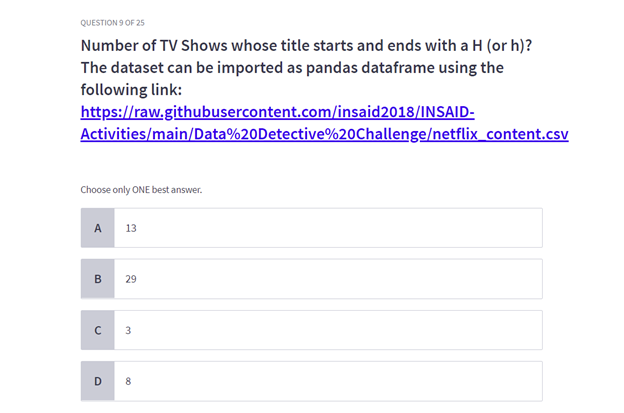


In [9]:
df_nf.to_excel('Netflix.xlsx')
df_nf1=df_nf[['show_id','type','title']]
df_nfc=df_nf1.copy()
df_nf2=df_nfc[df_nfc['type']=='TV Show']
df_nf2['St_End_H']=(((df_nfc['title'].str.startswith('H')) & (df_nfc['title'].str.endswith('H')))|\
                    ((df_nfc['title'].str.startswith('H')) & (df_nfc['title'].str.endswith('h')))|\
                    ((df_nfc['title'].str.startswith('h')) & (df_nfc['title'].str.endswith('h')))|\
                    ((df_nfc['title'].str.startswith('h')) & (df_nfc['title'].str.endswith('H'))))
df_nf2.to_excel('Netflix_cond.xlsx')
df_nf3=df_nf2.loc[df_nf2['St_End_H'] == True]
print("TV Shows those have titles starting and ending with 'H'=",len(df_nf3))
df_nf3


<ipython-input-9-df718780321d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nf2['St_End_H']=(((df_nfc['title'].str.startswith('H')) & (df_nfc['title'].str.endswith('H')))|\


TV Shows those have titles starting and ending with 'H'= 6


,show_id,type,title,St_End_H
2563,s2564,TV Show,H,True
2618,s2619,TV Show,Happyish,True
2645,s2646,TV Show,Hasmukh,True
2676,s2677,TV Show,Heartbreak High,True
2788,s2789,TV Show,Home: Adventures with Tip & Oh,True
2880,s2881,TV Show,Hymn of Death,True


# 9_Answer =  Correct Answer isn't available in the Answers list
====================================================================================================================

# Q10

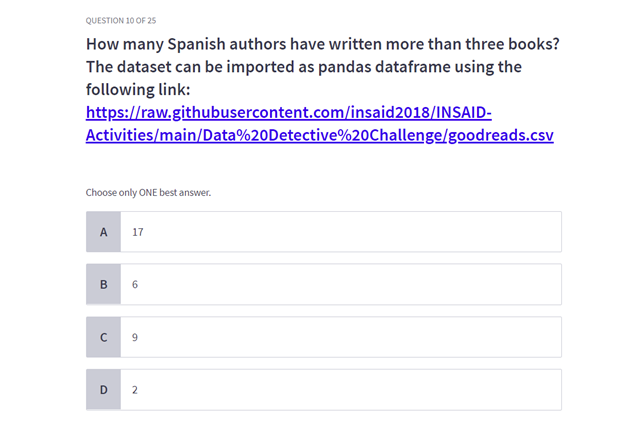

In [156]:
df_gr=df_gr[df_gr['language_code']=='spa']
df_gr.to_excel('GR.xlsx')
#authors, bookID
bk_cnt=df_gr.groupby('authors')['bookID'].count()
df_gr['Book_Count']=df_gr.groupby('authors')['bookID'].transform('count')
df_gr.to_excel('GR2.xlsx')
df_gr2=df_gr.loc[df_gr['Book_Count']>3]
df_gr2.to_excel('GR3.xlsx')
n = len(pd.unique(df_gr2['authors']))
print("No. of Spanish authors who have written >3 books = ",n)
#df_nbg_rtc_ng=df_rt.loc[df_rt['neighbourhood_group'] == ng_rtc_max]

No. of Spanish authors who have written >3 books =  6


# 10_Answer = Option B: 6
====================================================================================================================

# Q11

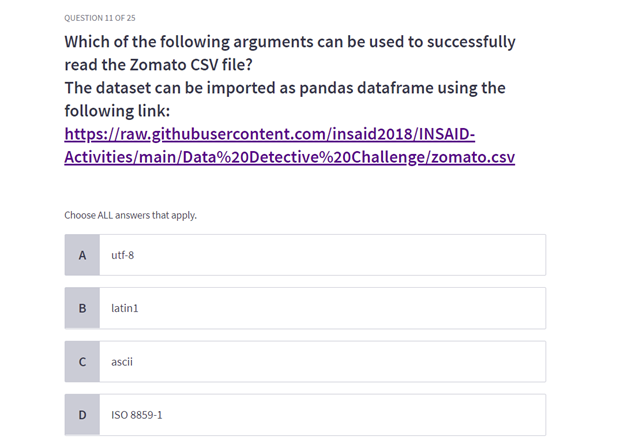

# 11_Answer = Option B: latin1
====================================================================================================================

# Q12

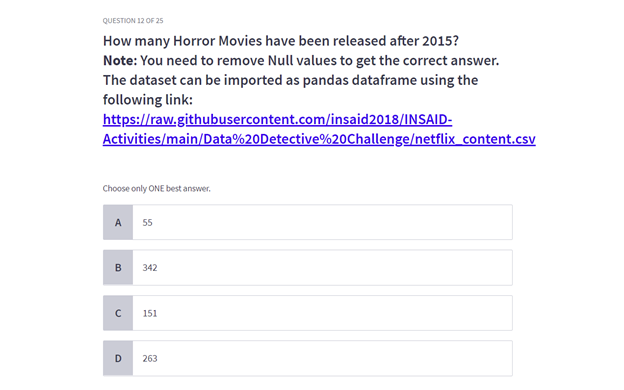

In [157]:
df_nf2=df_nf[(df_nf['type']=='Movie') & (df_nf['primary_genre']=='Horror Movies') & (df_nf['release_year']>2015) ]
df_nf2.to_excel('Horror_Movies.xlsx')
print("No. of Horror movies released after 2015 = ",len(df_nf2))

No. of Horror movies released after 2015 =  156


# 12_Answer = Option C: 151 (Code returns answer as 156, filtered data seems to be correct. Need to investigate)
====================================================================================================================

# Q13

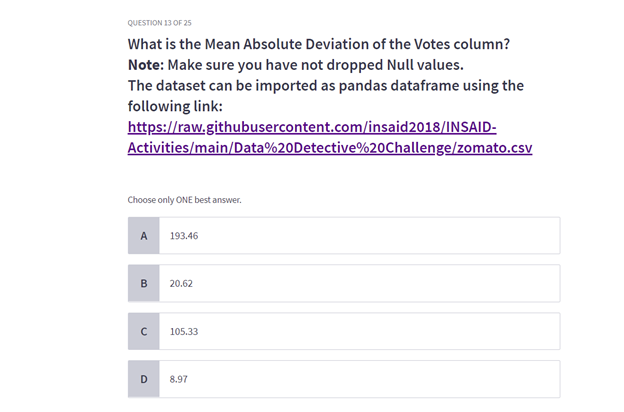

In [158]:
df_zom.to_excel('Zomato.xlsx')
mad=df_zom['Votes'].mad()
print("Mean Absolute Deviation of Votes = ",mad)

Mean Absolute Deviation of Votes =  193.46493877037068


# 13_Answer = Option A: 193.46
====================================================================================================================

# Q14

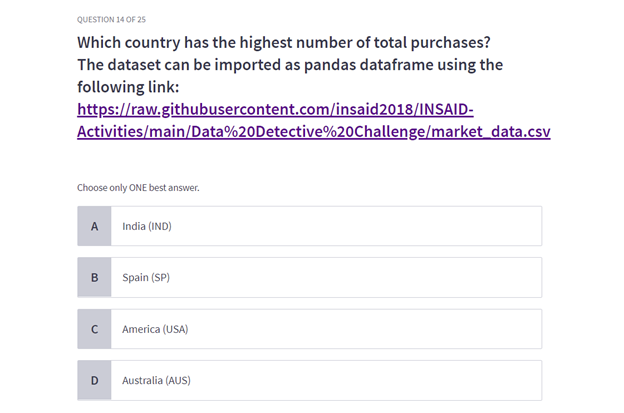

In [159]:
df_mkt['TotalPurchases']=df_mkt['NumDealsPurchases'].map(int)+df_mkt['NumWebPurchases'].map(int)+\
                   df_mkt['NumCatalogPurchases'].map(int)+df_mkt['NumStorePurchases'].map(int)
df_tp=pd.DataFrame(df_mkt.groupby('Country')['TotalPurchases'].sum())
df_tp.reset_index(inplace=True)
df_tp.columns=['Country','TotalPurchases']
print(df_tp)
df_tp.loc[df_tp['TotalPurchases']==df_tp['TotalPurchases'].max()]

  Country  TotalPurchases
0     AUS            2314
1      CA            4101
2     GER            1788
3     IND            2099
4      ME              59
5      SA            5117
6      SP           16052
7      US            1761


,Country,TotalPurchases
6,SP,16052


# 14_Answer = Option B: Spain(SP)
====================================================================================================================

# Q15

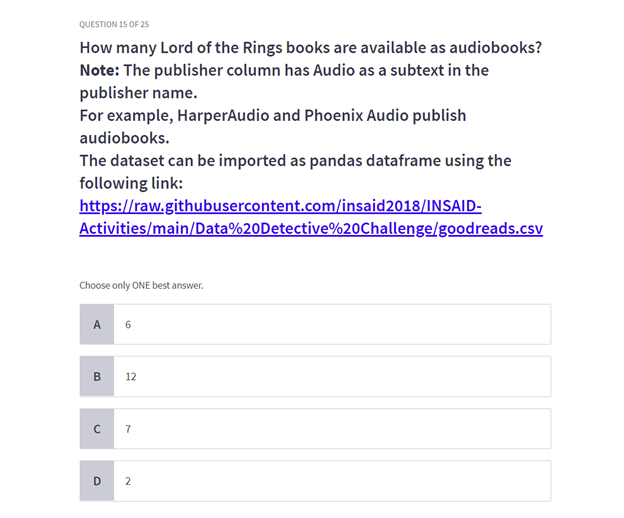

In [160]:
df_gr=pd.read_csv(url4)
df_gr.to_excel('GR.xlsx')
df_gr_lor=df_gr[(df_gr['title'].str.contains('Lord of the Rings',case=False)) & \
                (df_gr['publisher'].str.contains('Audio',case=False))]
print("No. of Lord of the Rings Book available as Audio Books = ", len(df_gr_lor))

No. of Lord of the Rings Book available as Audio Books =  2


# 15_Answer = Option D: 2
====================================================================================================================

# Q16

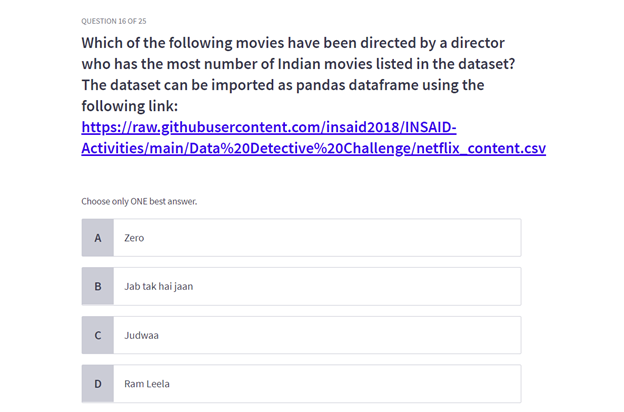

In [163]:
url3="https://raw.githubusercontent.com/insaid2018/INSAID-Activities/main/Data%20Detective%20Challenge/netflix_content.csv"
df_nf=pd.read_csv(url3)
df_nf_ind=df_nf[(df_nf['country']=='India') & (df_nf['type']=='Movie')]
dir_cnt=df_nf_ind.groupby('director')['show_id'].count()
dir=dir_cnt.idxmax()
df_dir_cnt=pd.DataFrame(dir_cnt)
df_dir_cnt.reset_index(inplace=True)
df_dir_cnt.columns=['Director','No. of Movies']
#print(df_dir_cnt)
df_dir_cnt.to_excel('Dir_mov_cnt.xlsx')
df_nf_ind_movf=df_nf_ind[df_nf_ind['director']==dir]
df_nf_ind_movf['title']

1262                       Chal Mere Bhai
1286                      Chashme Baddoor
1287                      Chashme Buddoor
2643                 Haseena Maan Jaayegi
3233                               Judwaa
3234                             Judwaa 2
3481    Kyo Kii... Main Jhuth Nahin Bolta
3874                Maine Pyaar Kyun Kiya
4273                 Mujhse Shaadi Karogi
Name: title, dtype: object

# 16_Answer = Option C: Judwaa
====================================================================================================================

# Q17

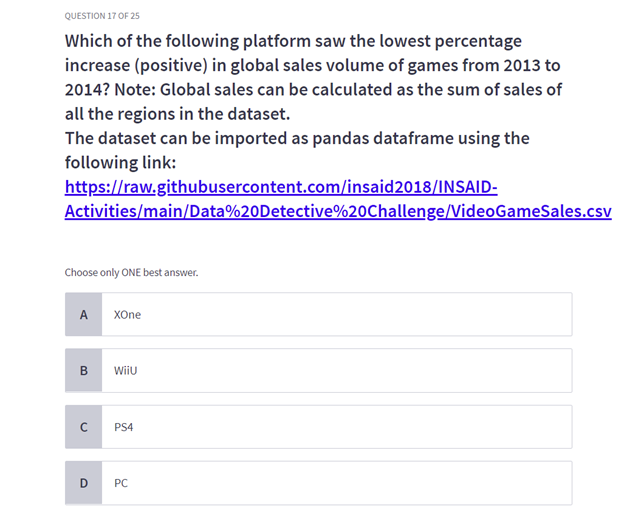

In [32]:
df_vg.to_excel('Video_Game.xlsx')
df_vg_sos=df_vg.copy()
df_vg_sos['Global_Sales_Volume']=df_vg_sos['NA_Sales_Volume'].map(float)+df_vg_sos['EU_Sales_Volume'].map(float)+\
                   df_vg_sos['JP_Sales_Volume'].map(float)+df_vg_sos['Other_Sales_Volume'].map(float)
df_vg_sos2=df_vg_sos.copy()
df_vg_sos3=df_vg_sos2[(df_vg_sos['Year']== 2013) | (df_vg_sos['Year']== 2014)]
df_vg_sos3[['Name','Year','Platform','Global_Sales_Volume']]
df_vg_sos4=df_vg_sos3[['Platform','Year','Global_Sales_Volume']]
df_vg_sos4.to_excel('VG_2.xlsx')
df_vg_sos5=df_vg_sos4.copy()
df_vg_sos5['SoS']=df_vg_sos5.groupby(['Platform','Year'])['Global_Sales_Volume'].transform('sum')
df_vg_sos5.to_excel('VG_3.xlsx')
df_vg_sos6=df_vg_sos5[['Platform','Year','SoS']]
df_vg_sos7=df_vg_sos6.copy()
df_vg_sos7.drop_duplicates(inplace=True)
df_vg_sos7=df_vg_sos7.sort_values(by=['Platform','Year'])
df_vg_sos7.reset_index(drop=True,inplace=True)
df_vg_sos7
#df_vg
#df_vg_sos7['Percentage_Change'] = df_vg_sos7.groupby(['Platform'])['SoS'].transform((df['Year']==)
#df_vg_sos8=df_vg_sos7[[df_vg_sos7['Year']==2013],'SoS'.iloc[0]]

,Platform,Year,SoS
0,3DS,2013.0,55.86
1,3DS,2014.0,43.12
2,DS,2013.0,1.96
3,DS,2014.0,0.02
4,PC,2013.0,12.80
5,PC,2014.0,13.33
6,PS3,2013.0,117.42
7,PS3,2014.0,50.97
8,PS4,2013.0,24.76
9,PS4,2014.0,98.83


# Q18

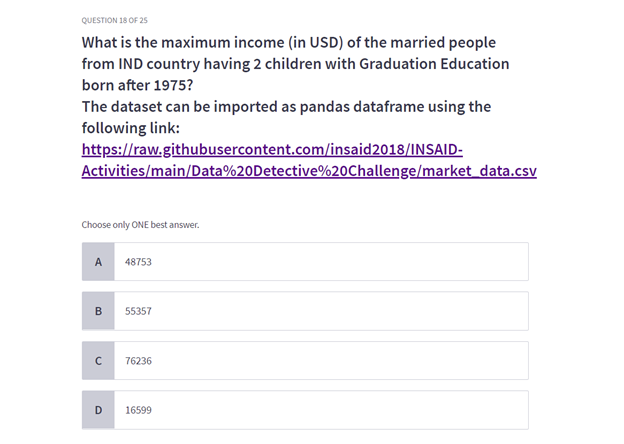

In [165]:
df_mkt_ind=df_mkt[(df_mkt['Country']=='IND') & (df_mkt['Marital_Status']=='Married')]
df_mkt_ind_tc=df_mkt_ind.copy()
df_mkt_ind_tc['Total_Children']=df_mkt_ind['Kidhome'].map(int)+df_mkt_ind['Teenhome'].map(int)
df_mkt_ind_tc
df_mkt_ind_sal=df_mkt_ind_tc.loc[(df_mkt_ind_tc['Kidhome']==2) & \
                   (df_mkt_ind_tc['Education']=='Graduation') &\
                   (df_mkt_ind_tc['Year_Birth']>1975)]
df_mkt_ind_sal_cal=df_mkt_ind_sal.copy()
#df_mkt_ind_sal_cal['Income'].str.replace('$','')
df_mkt_ind_sal_cal['Income_Int'] = df_mkt_ind_sal_cal['Income'].apply(lambda x: x.replace('$', ''))
df_mkt_ind_sal_cal
max_sal=df_mkt_ind_sal_cal['Income_Int'].max()
print("The maximum income (in USD) of the married people from IND country having 2 children \n" \
       "with Graduation Education born after 1975 = ",max_sal)

The maximum income (in USD) of the married people from IND country having 2 children 
with Graduation Education born after 1975 =  55,357.00 


# 18_Answer = Option B: 55357
====================================================================================================================

# Q19

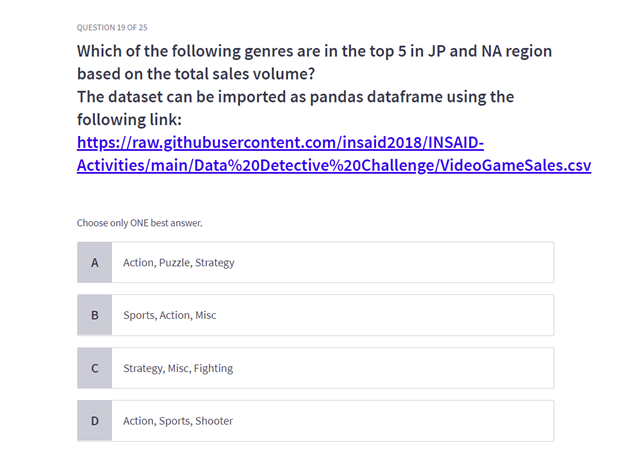

In [167]:
df_vg_sos=df_vg.copy()
df_vg_sos['SV_JP_NA']=df_vg_sos['NA_Sales_Volume'].map(float)+df_vg_sos['JP_Sales_Volume'].map(float)
df_vg_gn=df_vg_sos[['Genre','SV_JP_NA']]
df_vg_gn.drop_duplicates()
df_vg_gn2=df_vg_gn.copy()
df_vg_gn2['Genre_Top']=df_vg_gn2.groupby('Genre')['SV_JP_NA'].transform('max')
df_vg_gn2
df_vg_gn2.drop_duplicates(inplace=True)
df_vg_gn2.reset_index(drop=True,inplace=True)
df_vg_gn3=df_vg_gn2[['Genre','Genre_Top']]
df_vg_gn4=df_vg_gn3.copy()
df_vg_gn4.drop_duplicates(inplace=True)
gn_list=[df_vg_gn4['Genre_Top'].nlargest(10)]
df_vg_gn4[df_vg_gn4['Genre_Top'].isin(gn_list)]
#df_vg_gn4['Genre_Top_Is'] = np.where((df_vg_gn4['Genre_Top'].isin(gn_list)), 1, 0)
df_vg_gn4=df_vg_gn4.sort_values(by='Genre_Top',ascending=False)
df_vg_gn4.reset_index(drop=True,inplace=True)
df_vg_gn4.head(10)

,Genre,Genre_Top
0,Sports,45.26
1,Platform,35.89
2,Puzzle,27.42
3,Shooter,27.21
4,Role-Playing,21.49
5,Racing,19.64
6,Misc,16.96
7,Simulation,11.00
8,Action,9.84
9,Fighting,9.41


# 19_Answer = Option D: Action, Sports, Shooter
====================================================================================================================

# Q20

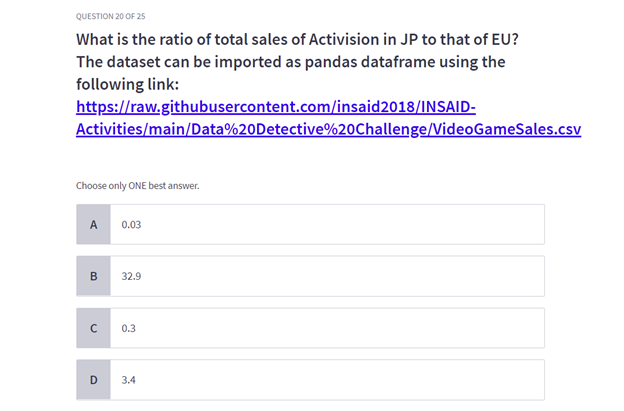

In [169]:
df_vg_act=df_vg[df_vg['Publisher']=='Activision']
df_vg_act[['Publisher','EU_Sales_Volume','JP_Sales_Volume']]
df_vg_act_f=df_vg_act.copy()
df_vg_act_f['EU_SoS']=df_vg_act_f.groupby('Publisher')['EU_Sales_Volume'].transform('sum')
df_vg_act_f['JP_SoS']=df_vg_act_f.groupby('Publisher')['JP_Sales_Volume'].transform('sum')
df_vg_act_f=df_vg_act_f[['Publisher','EU_SoS','JP_SoS']]
df_vg_act_f.columns
df_vg_act_f.drop_duplicates(inplace=True)
df_vg_act_f.reset_index(drop=True,inplace=True)
r=float(df_vg_act_f['JP_SoS'].values)/float(df_vg_act_f['EU_SoS'].values)
print('The ratio of total sales of Activision in JP to that of EU =',r)
df_vg_act_f

The ratio of total sales of Activision in JP to that of EU = 0.030343803646823993


,Publisher,EU_SoS,JP_SoS
0,Activision,215.53,6.54


# 20_Answer = Option A: 0.03
====================================================================================================================

# Q21

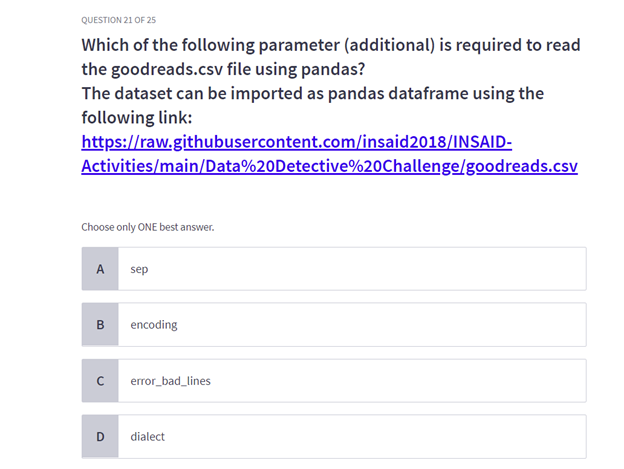

# 21_Answer = Option B: encoding
====================================================================================================================

# Q22

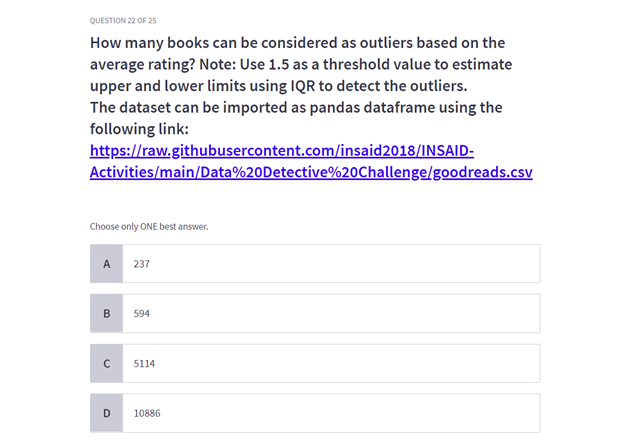

In [170]:
print(df_gr.median())
Q1=df_gr['average_rating'].quantile(0.25)
Q3=df_gr['average_rating'].quantile(0.75)
IQR=Q3-Q1
Outl1=(Q1 - 1.5 * IQR)
Outl2=(Q3 + 1.5 * IQR)
print("\n IQR = {} , Outl1={}, Oult2={}".format(IQR,Outl1,Outl2))
df_gr1=df_gr[df_gr['average_rating']<Outl1]
df_gr2=df_gr[df_gr['average_rating']>Outl2]
a,b=len(df_gr1),len(df_gr2)
c=a+b
print("\n No. of books those can be considered as outliers based on the average rating =",c)

bookID                2.028700e+04
average_rating        3.960000e+00
isbn13                9.780582e+12
num_pages             2.990000e+02
ratings_count         7.450000e+02
text_reviews_count    4.700000e+01
dtype: float64

 IQR = 0.36999999999999966 , Outl1=3.2150000000000007, Oult2=4.694999999999999

 No. of books those can be considered as outliers based on the average rating = 237


# 22_Answer = Option A: 237
====================================================================================================================

# Q23

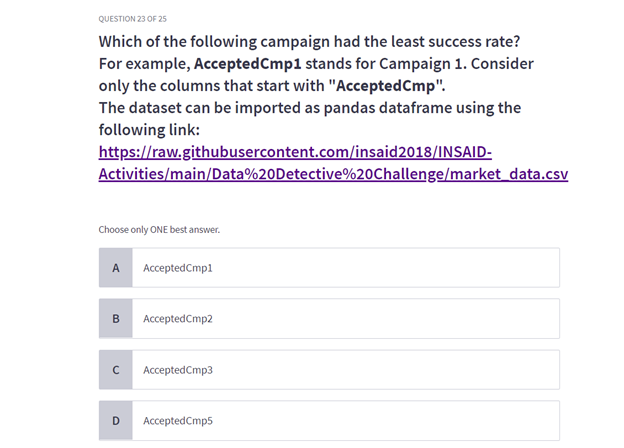

In [171]:
df_mkt5=df_mkt1.copy()
a1=df_mkt5[df_mkt5['AcceptedCmp1']==1]
a1_cnt=len(a1)
a2=df_mkt5[df_mkt5['AcceptedCmp2']==1]
a2_cnt=len(a2)
a3=df_mkt5[df_mkt5['AcceptedCmp3']==1]
a3_cnt=len(a3)
a4=df_mkt5[df_mkt5['AcceptedCmp4']==1]
a4_cnt=len(a4)
a5=df_mkt5[df_mkt5['AcceptedCmp5']==1]
a5_cnt=len(a5)
print('\n AcceptedCmp1 = {} \n AcceptedCmp2 = {} \n AcceptedCmp3 = {} \n AcceptedCmp4 = {} \n AcceptedCmp5 = {} \n'\
       .format(a1_cnt,a2_cnt,a3_cnt,a4_cnt,a5_cnt))
#df_mkt5['Count']=df_mkt5['Combine'].str.count('1')
#df_mkt5[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Count']]


 AcceptedCmp1 = 78 
 AcceptedCmp2 = 16 
 AcceptedCmp3 = 83 
 AcceptedCmp4 = 89 
 AcceptedCmp5 = 89 



# 23_Answer = Option B: AcceptedCmp2
====================================================================================================================

# Q24

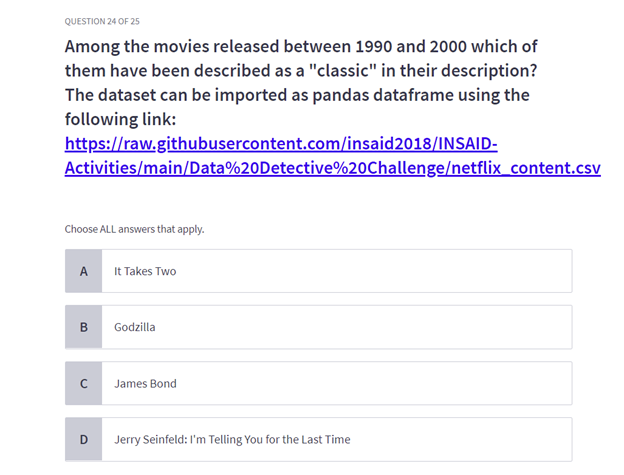

In [172]:
df_nf_cl=df_nf[(((df_nf['release_year']>=1991) | (df_nf['release_year']<=1999)) & \
               (df_nf['type']=='Movie') & (df_nf['description'].str.contains('classic',case=False))) ]
df_nf_cl.reset_index(drop=True,inplace=True)
df_nf_cl[['title','release_year','description']]

,title,release_year,description
0,Arjun: The Warrior Prince,2011,This animated retelling of the classic Indian ...
1,Bioscope,2015,Inspired by classic and contemporary literatur...
2,Born Strong,2017,Four 400-pound giants fight for the crown at t...
3,Charlie's Angels,2000,"Three beauties use their looks, charm and mart..."
4,Charlie's Angels: Full Throttle,2003,"In this reboot of the TV classic, the Angels a..."
5,Day of the Dead: Bloodline,2018,A former medical student battles for survival ...
6,De Palma,2015,Iconoclastic film director Brian DePalma takes...
7,Don Quixote: The Ingenious Gentleman of La Mancha,2015,In this modern adaptation of a Spanish classic...
8,Dr. Seuss' The Lorax,2012,The forest-dwelling Lorax has to stop the shor...
9,Eddie Murphy: Raw,1987,This stand-up comedy classic features Eddie Mu...


# 24_Answer = Option A:  It Takes Two
====================================================================================================================

# Q25

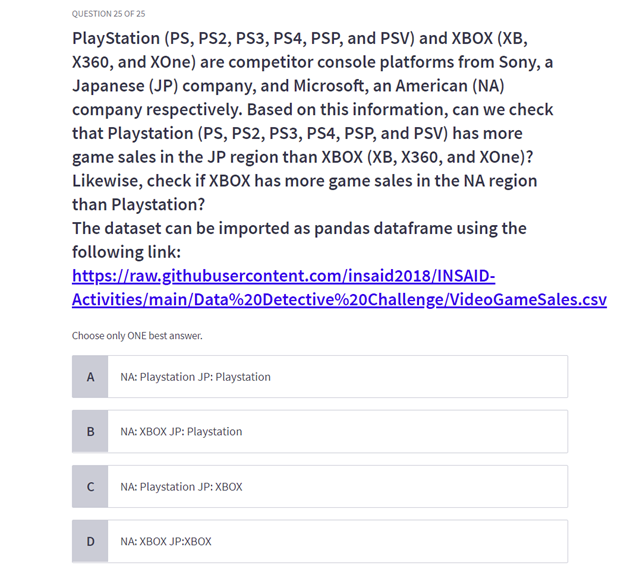

In [173]:
df_vg['Platform'].unique()
df_vg_cmp=df_vg.copy()
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('PS', 'Playstation'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('PS2', 'Playstation'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('PS3', 'Playstation'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('PS4', 'Playstation'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('PSV', 'Playstation'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('Playstation2', 'Playstation'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('Playstation3', 'Playstation'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('Playstation4', 'Playstation'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('PlaystationV', 'Playstation'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('PlaystationP', 'Playstation'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('X360', 'XBox'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('XB', 'XBox'))
df_vg_cmp['Platform']=df_vg_cmp['Platform'].apply(lambda x: x.replace('XOne', 'XBox'))
df_vg_cmp['Platform'].unique()
df_vg_cmp2=df_vg_cmp[['Platform','NA_Sales_Volume','JP_Sales_Volume']]
df_vg_cmp2=df_vg_cmp2[(df_vg_cmp2['Platform']=='Playstation') | (df_vg_cmp2['Platform']=='XBox')]
df_vg_cmp2['NA_SoS']=df_vg_cmp2.groupby('Platform')['NA_Sales_Volume'].transform('sum')
df_vg_cmp2['JP_SoS']=df_vg_cmp2.groupby('Platform')['JP_Sales_Volume'].transform('sum')
df_vg_cmp3=df_vg_cmp2.copy()
df_vg_cmp3=df_vg_cmp3[['Platform','NA_SoS','JP_SoS']]
df_vg_cmp3.drop_duplicates(inplace=True)
df_vg_cmp3.reset_index(drop=True,inplace=True)
df_vg_cmp3

,Platform,NA_SoS,JP_SoS
0,Playstation,1534.60,471.06
1,XBox,269.88,1.72


# 25_Answer = Option A:  NA: Playstation JP: Playstation
====================================================================================================================